This notebook examines the changes of federal fundings in different areas in year 2023 to 2028

By Wanchen Hong

## 1. Load the Data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

capital_budget = pd.read_csv('data/capital_budget.csv')
operating_budget = pd.read_csv('data/operating_budget.csv')

In [22]:
capital_budget_area = capital_budget[['Neighborhood', 'Authorization_Previous',
       'Authorization_Current', 'Authorization_Future', 'Grant_Existing',
       'Grant_Current', 'Grant_Future', 'Capital_Expended', 'Capital_Year_0',
       'Capital_Year_1', 'Capital_Year_2_5', 'Grant_Expended', 'Grant_Year_0',
       'Grant_Year_1', 'GrantYear_2_5', 'External_Funds',
       'Total_Project_Budget']]

In [23]:
capital_budget_area.head()

,Neighborhood,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,Capital_Year_1,Capital_Year_2_5,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_2_5,External_Funds,Total_Project_Budget
0,Citywide,750000,1250000,0,0,0,0,0,0,100000,1900000,0,0,0,0,0,2000000
1,Mission Hill,1800000,0,0,0,0,0,0,100000,1500000,200000,0,0,0,0,0,1800000
2,North End,5000000,63000000,0,0,0,0,0,400000,3000000,64600000,0,0,0,0,20000000,88000000
3,Citywide,1300000,1000000,0,0,0,0,383450,450000,700000,766550,0,0,0,0,0,2300000
4,Citywide,1000000,0,0,0,0,0,17140,25000,250000,707860,0,0,0,0,0,1000000


## 2. Explore the area data

In [26]:
capital_budget_area = capital_budget_area.groupby('Neighborhood').sum().reset_index()
capital_budget_area.head()

,Neighborhood,Authorization_Previous,Authorization_Current,Authorization_Future,Grant_Existing,Grant_Current,Grant_Future,Capital_Expended,Capital_Year_0,Capital_Year_1,Capital_Year_2_5,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_2_5,External_Funds,Total_Project_Budget
0,Allston/Brighton,28535000,17050000,10000000,1000000,0,0,5174971,10825558,6222448,33362023,0,0,0,1000000,1020000,57605000
1,Back Bay,42980000,3100000,0,10862299,0,0,927943,7250000,18300000,19602057,6687843,2143308,1600000,431148,8500000,65442299
2,Bay Village,1355000,0,0,0,0,0,5758,25000,225000,1099242,0,0,0,0,170000,1525000
3,Beacon Hill,3100000,8310000,0,23000000,0,0,0,100000,700000,10610000,823432,90000,175000,21911568,0,34410000
4,Charlestown,104181468,41000000,0,40963403,2000000,2000000,11844549,4630574,47050000,81656345,16511318,525000,5700000,22227085,341067519,531212390


In [27]:
capital_budget_area['total_expenditure']= capital_budget_area[['Capital_Expended', 'Capital_Year_0',
       'Capital_Year_1', 'Capital_Year_2_5', 'Grant_Expended', 'Grant_Year_0',
       'Grant_Year_1', 'GrantYear_2_5']].sum(axis=1)
capital_budget_area['total_budget']= capital_budget_area[['Authorization_Previous',
       'Authorization_Current', 'Authorization_Future', 'Grant_Existing',
       'Grant_Current', 'Grant_Future', 'External_Funds']].sum(axis=1)


In [29]:
capital_budget_area[['Neighborhood','total_expenditure', 'total_budget', 'Total_Project_Budget']]

,Neighborhood,total_expenditure,total_budget,Total_Project_Budget
0,Allston/Brighton,56585000,57605000,57605000
1,Back Bay,56942299,65442299,65442299
2,Bay Village,1355000,1525000,1525000
3,Beacon Hill,34410000,34410000,34410000
4,Charlestown,190144871,531212390,531212390
5,Chinatown,271272172,271272172,271272172
6,Citywide,1056416895,1056966895,1056966895
7,Dorchester,237741239,239411239,239411239
8,Downtown/Government Center,318415000,318415000,318415000
9,East Boston,61811890,62457890,62457890


#### The total project budget column is the sum of all captital expenditures and all capital grant expenditures, while the sum of all expidtures for each neighborhood is all less than or equal to their budget. 

<Axes: ylabel='Neighborhood'>

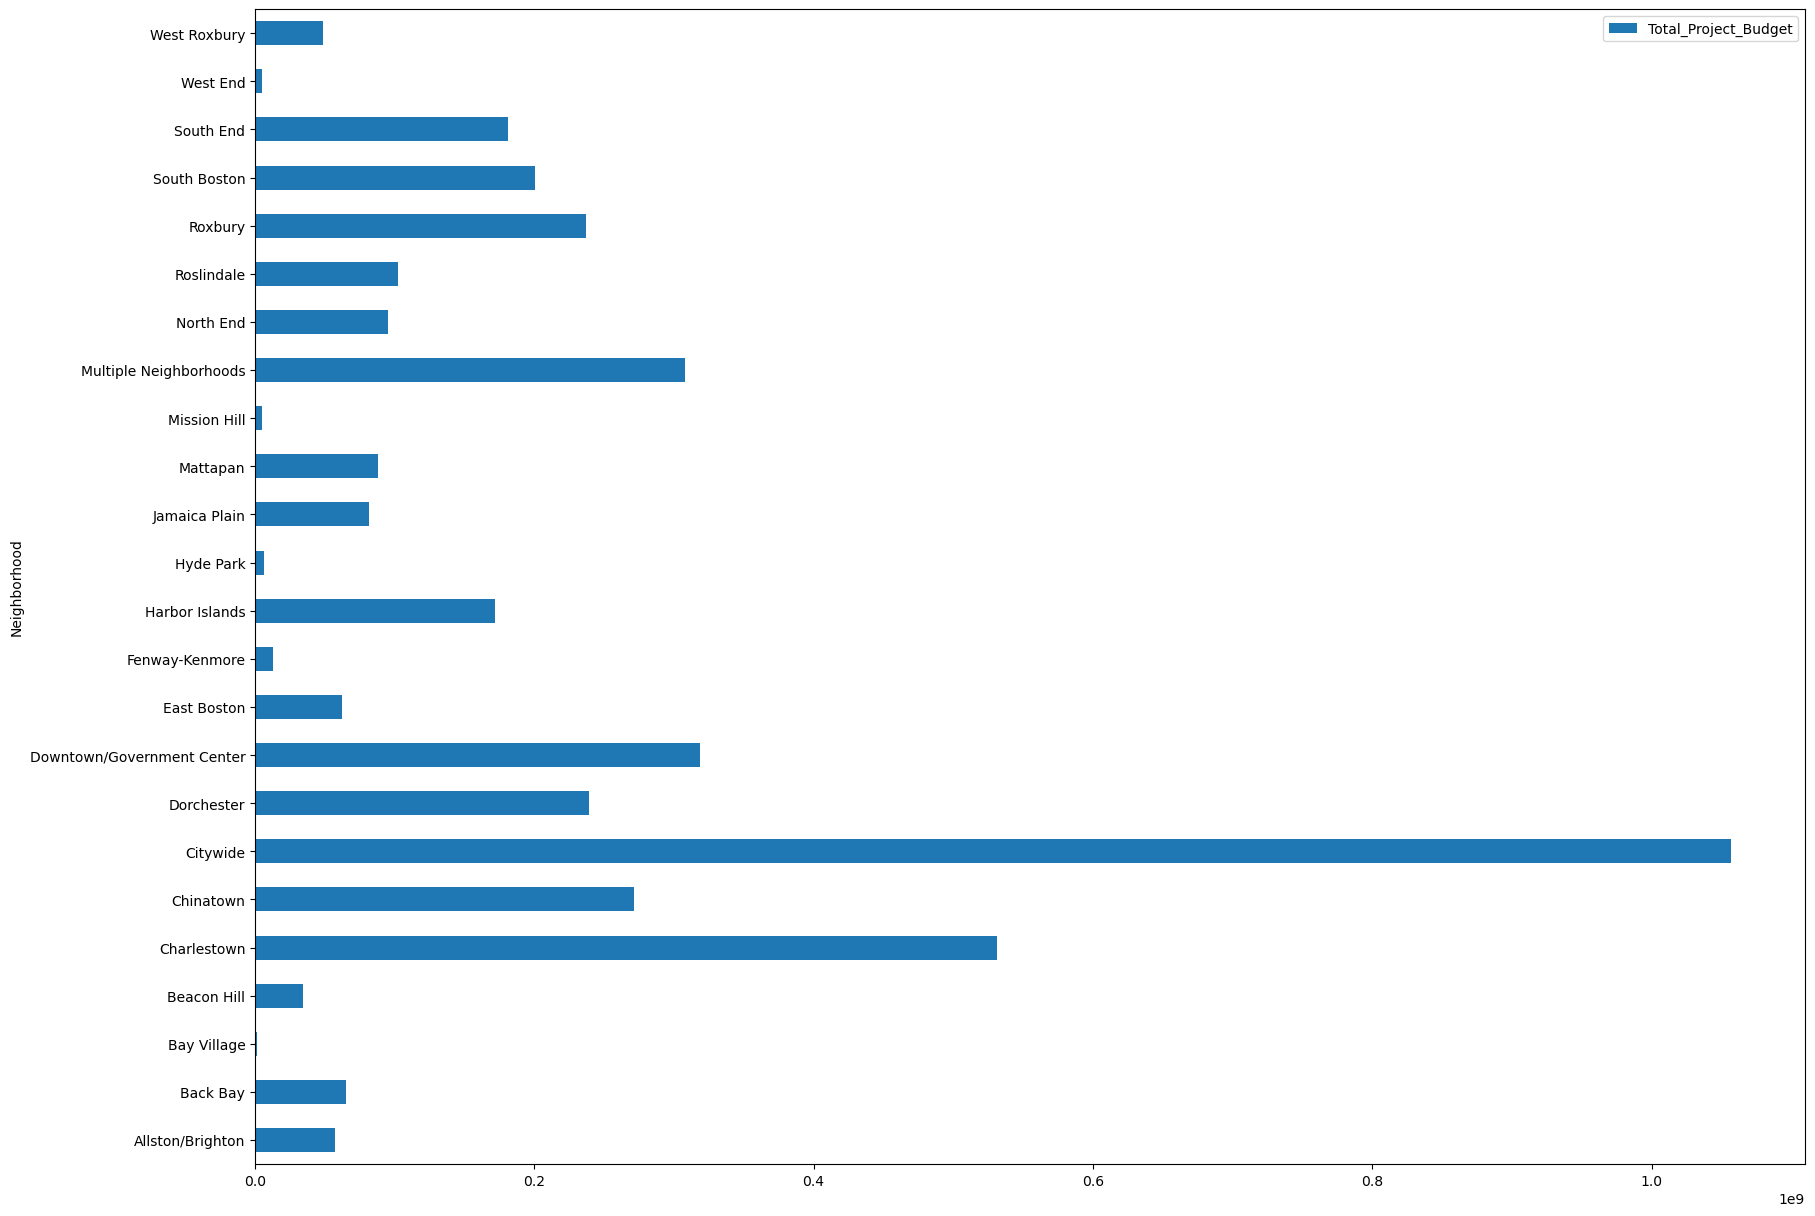

In [5]:
capital_budget_area.plot.barh(x='Neighborhood', y='Total_Project_Budget', figsize=(20,15))

The total budget has a large variation between different neighborhood. Perhaps this difference is caused by the area difference, or maybe other factors. This would be an interesting difference to explore.

## 3. Explore the change in expenditure and budget vs. time

### 3.1 Expenditure

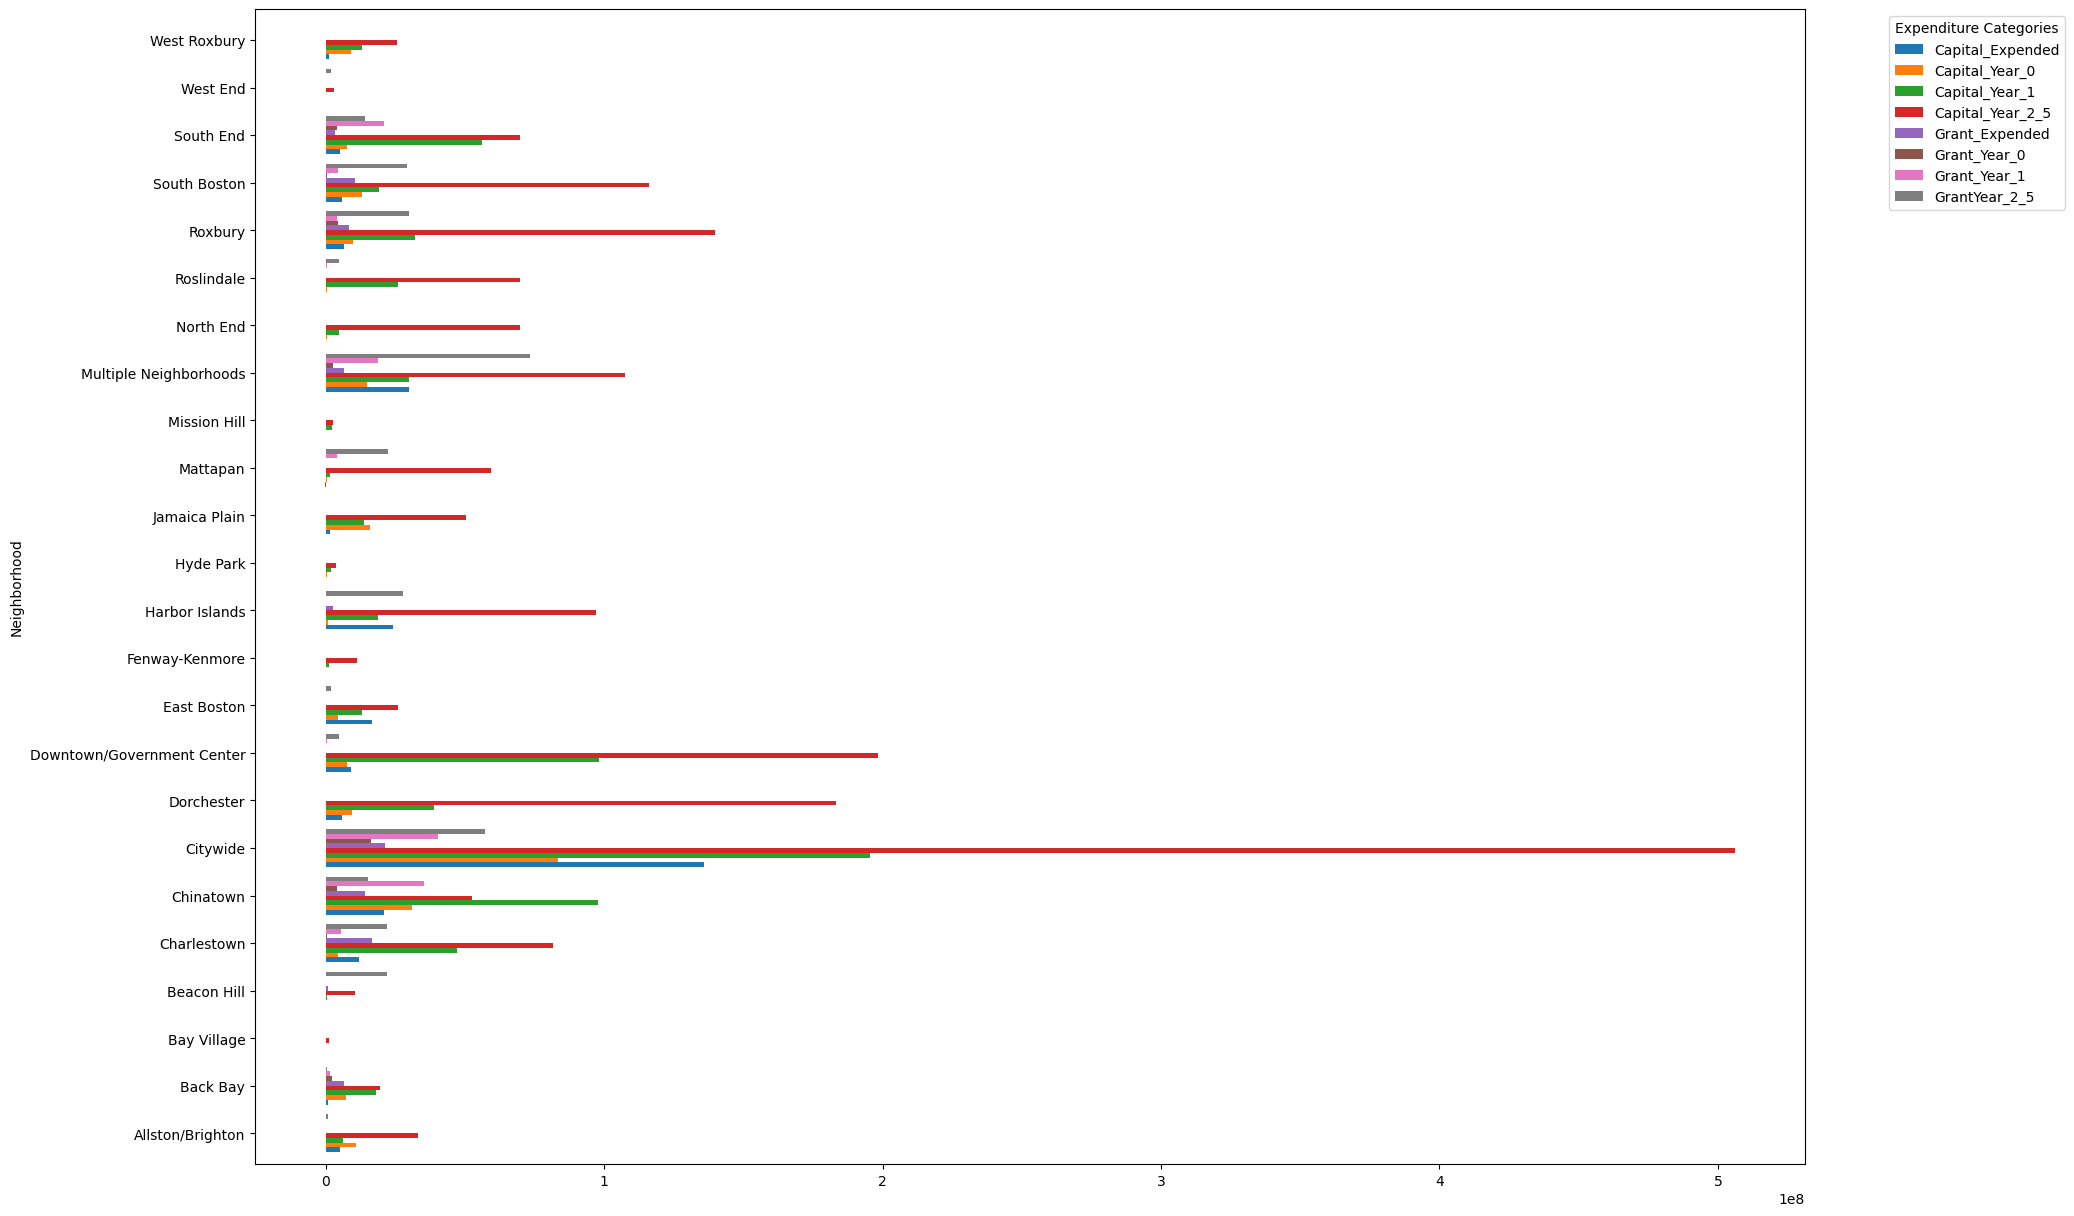

In [31]:
# compare expenditures
expenditure_columns = ['Capital_Expended','Capital_Year_0','Capital_Year_1', 'Capital_Year_2_5', 'Grant_Expended', 'Grant_Year_0','Grant_Year_1', 'GrantYear_2_5']
capital_budget_area.plot.barh(x='Neighborhood', y=expenditure_columns, figsize=(20,15), width=0.8)

plt.legend(title='Expenditure Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The results show that the projected capital expenditure for future years, which is the red bar, is the highest for almost all areas. In general, the amount of capital grant expenditure is less than the amount of capital expenditure in almost all areas, and the projected expenditure for the future is much more than the expenditure for current years (year 0 and 1). For some areas, such as Harbor Islands and East Boston, the prior spendings are more than the spending for current years, while for the majority of areas, the spending for current years are higher than the prior spendings. This potentially indicates that the city has been put more overall fundings into most areas, which indicates that Boston is possibly impoving its infrastrues and basic benefits for the population.

Below is the detailed plot for each category of expenditure:

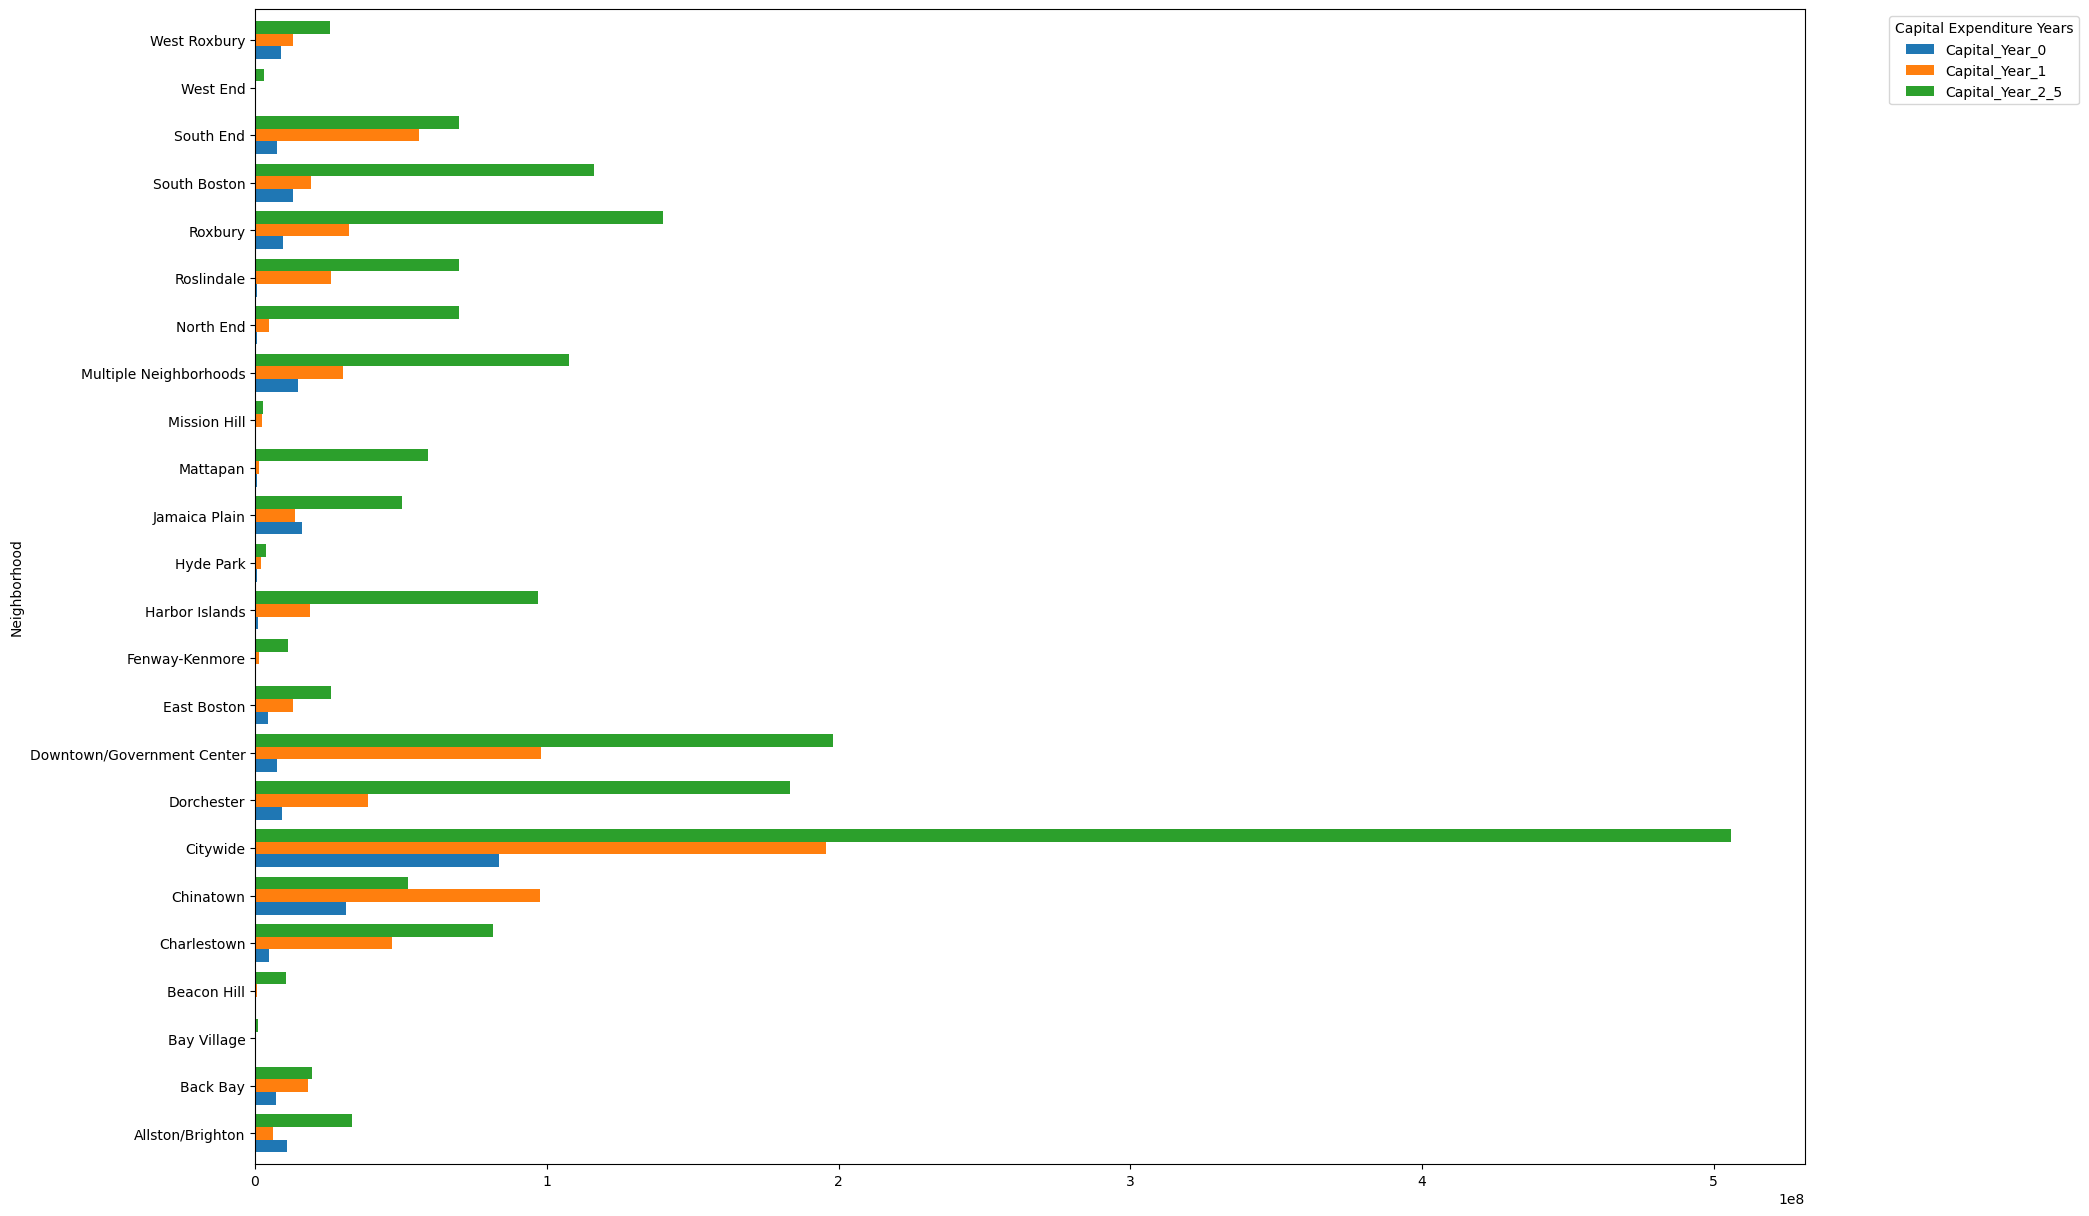

In [7]:
capital_expenditure_columns = ['Capital_Year_0','Capital_Year_1', 'Capital_Year_2_5']
capital_budget_area.plot.barh(x='Neighborhood', y=capital_expenditure_columns, figsize=(20,15), width=0.8)

plt.legend(title='Capital Expenditure Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

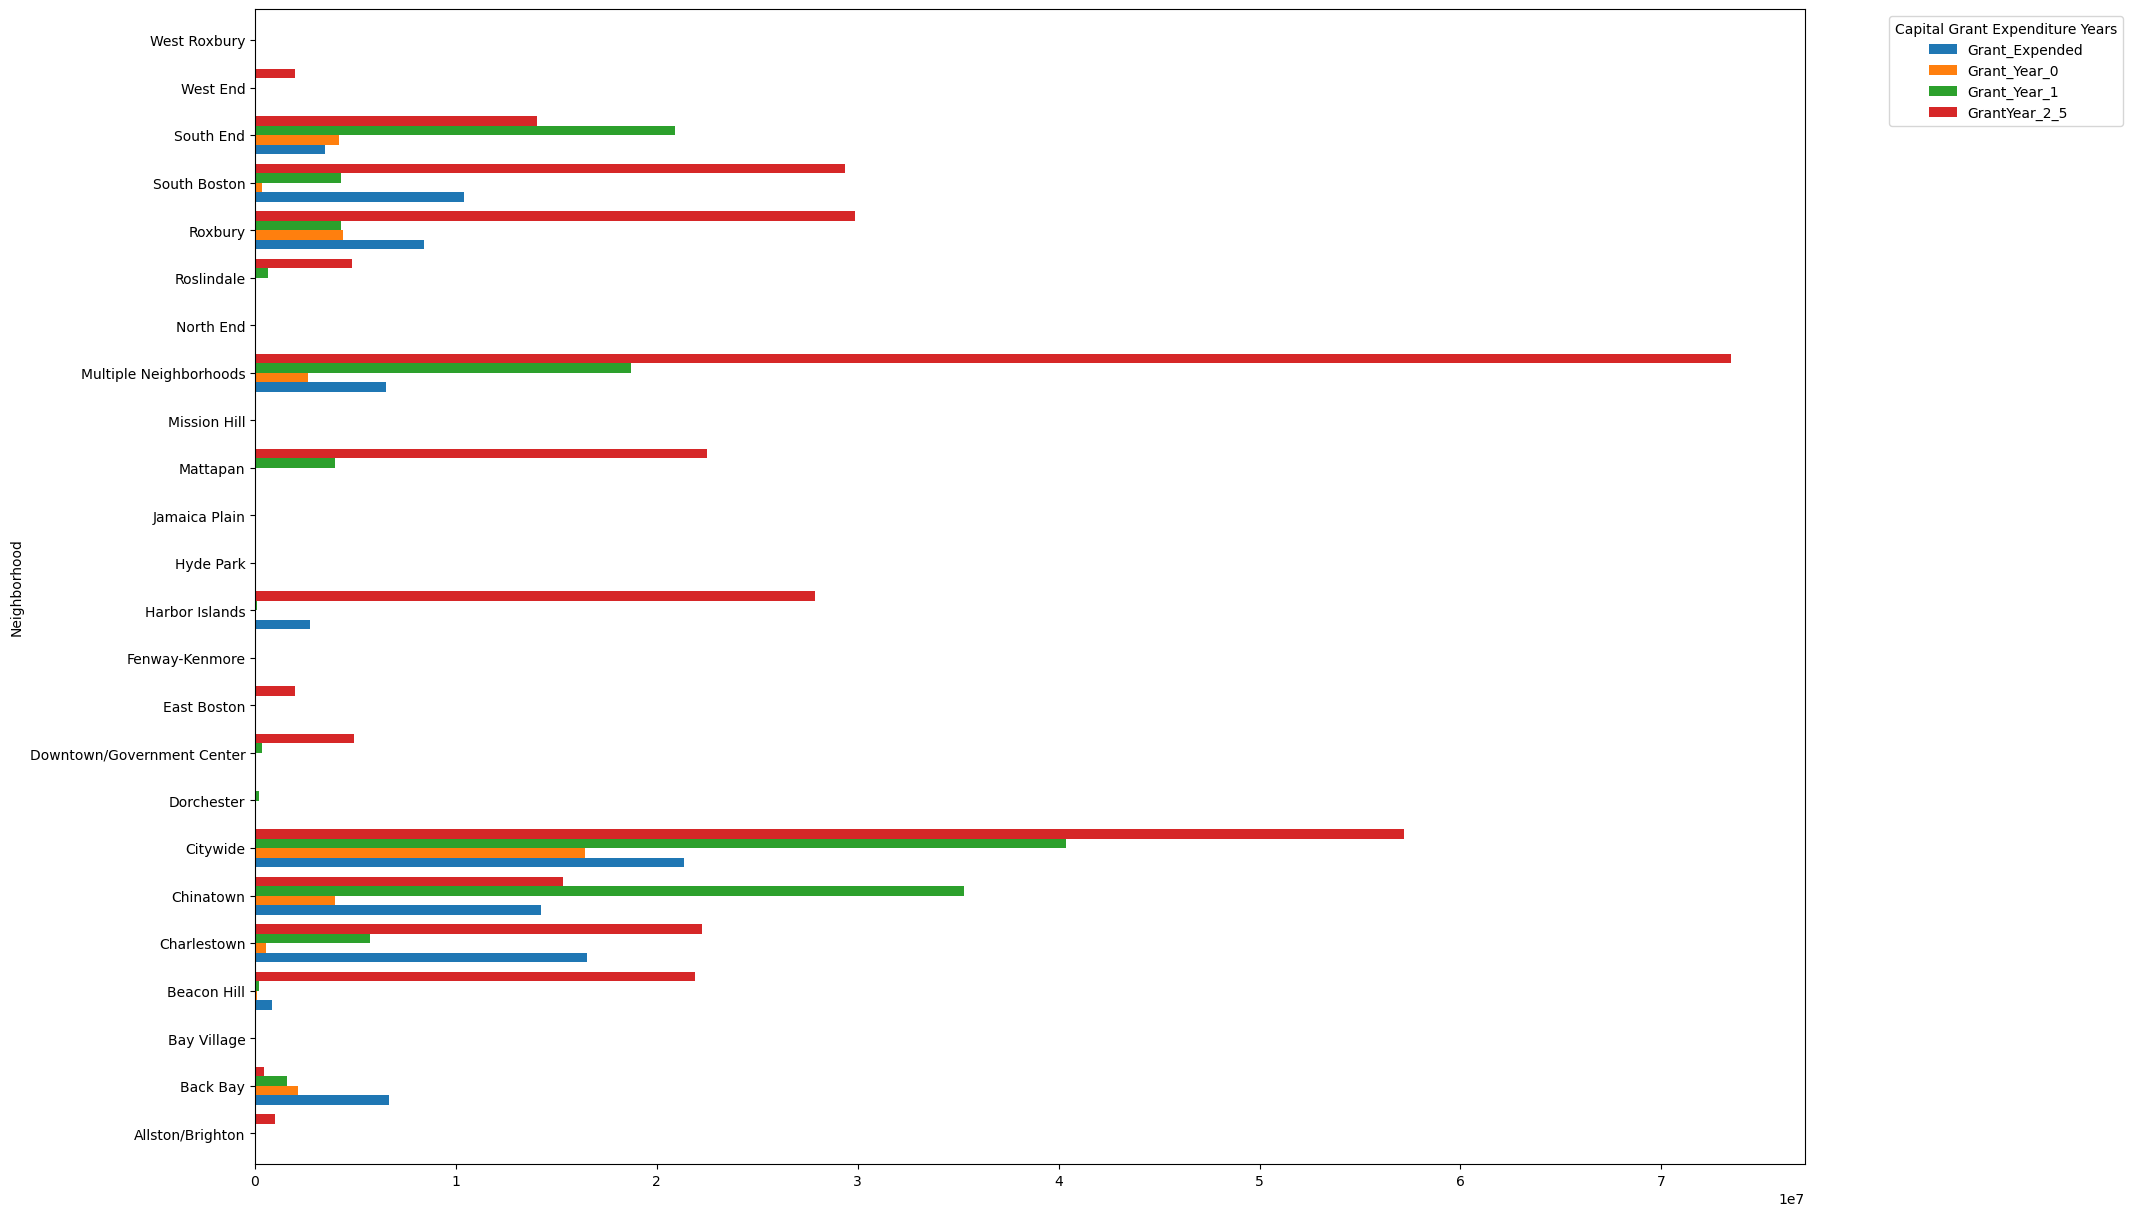

In [32]:
capital_grant_exp_columns = ['Grant_Expended', 'Grant_Year_0','Grant_Year_1', 'GrantYear_2_5']
capital_budget_area.plot.barh(x='Neighborhood', y=capital_grant_exp_columns, figsize=(20,15), width=0.8)

plt.legend(title='Capital Grant Expenditure Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

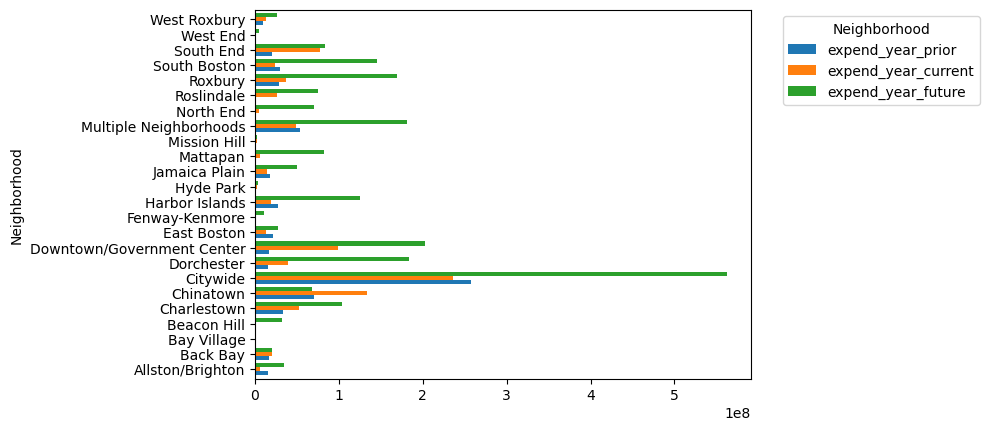

In [46]:
capital_budget_area['expend_year_prior'] = capital_budget_area[['Capital_Year_0', 'Grant_Year_0', 'Capital_Expended', 'Grant_Expended']].sum(axis=1)
capital_budget_area['expend_year_current'] = capital_budget_area[['Capital_Year_1', 'Grant_Year_1']].sum(axis=1)
capital_budget_area['expend_year_future'] = capital_budget_area[['Capital_Year_2_5', 'GrantYear_2_5']].sum(axis=1)

capital_budget_area[['Neighborhood', 'expend_year_prior', 'expend_year_current', 'expend_year_future']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

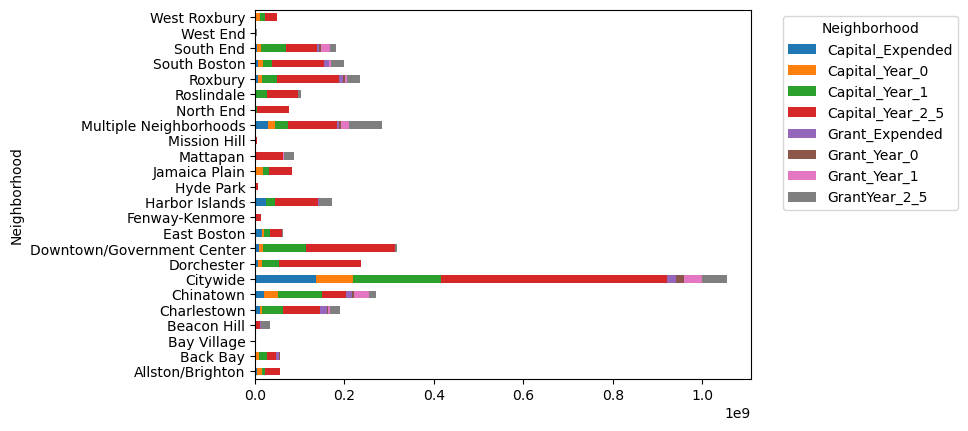

In [41]:
capital_budget_area[expenditure_columns + ['Neighborhood']].groupby('Neighborhood').sum().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Again, expenditure for almost all areas (except for Chinatown) are through future expenditures.

### 3.2 Budget

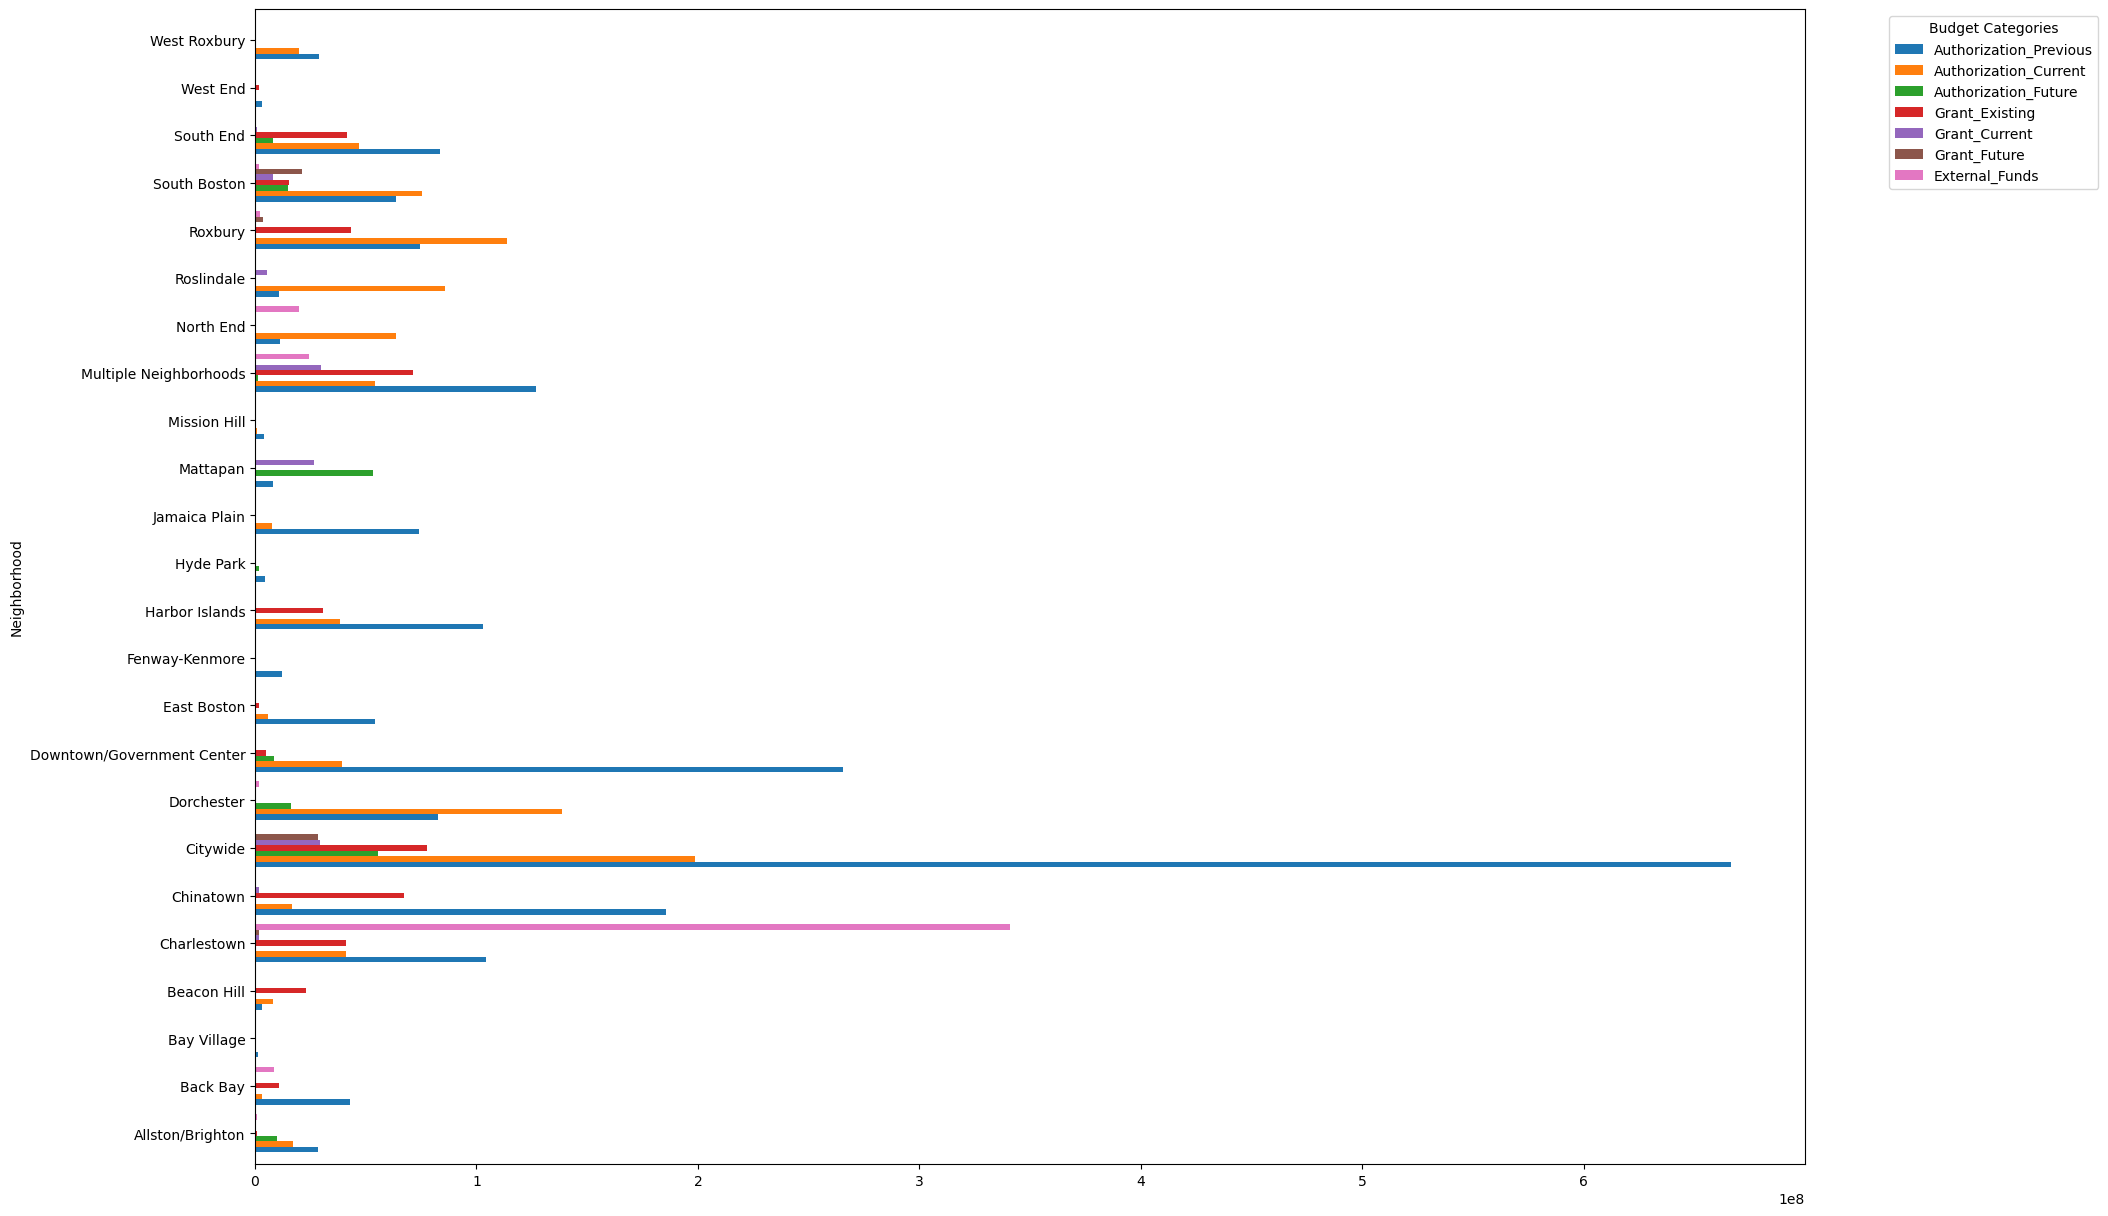

In [33]:
# compare budgets
budget_columns = ['Authorization_Previous',
       'Authorization_Current', 'Authorization_Future', 'Grant_Existing',
       'Grant_Current', 'Grant_Future', 'External_Funds']
capital_budget_area.plot.barh(x='Neighborhood', y=budget_columns, figsize=(20,15), width=0.8)

plt.legend(title='Budget Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


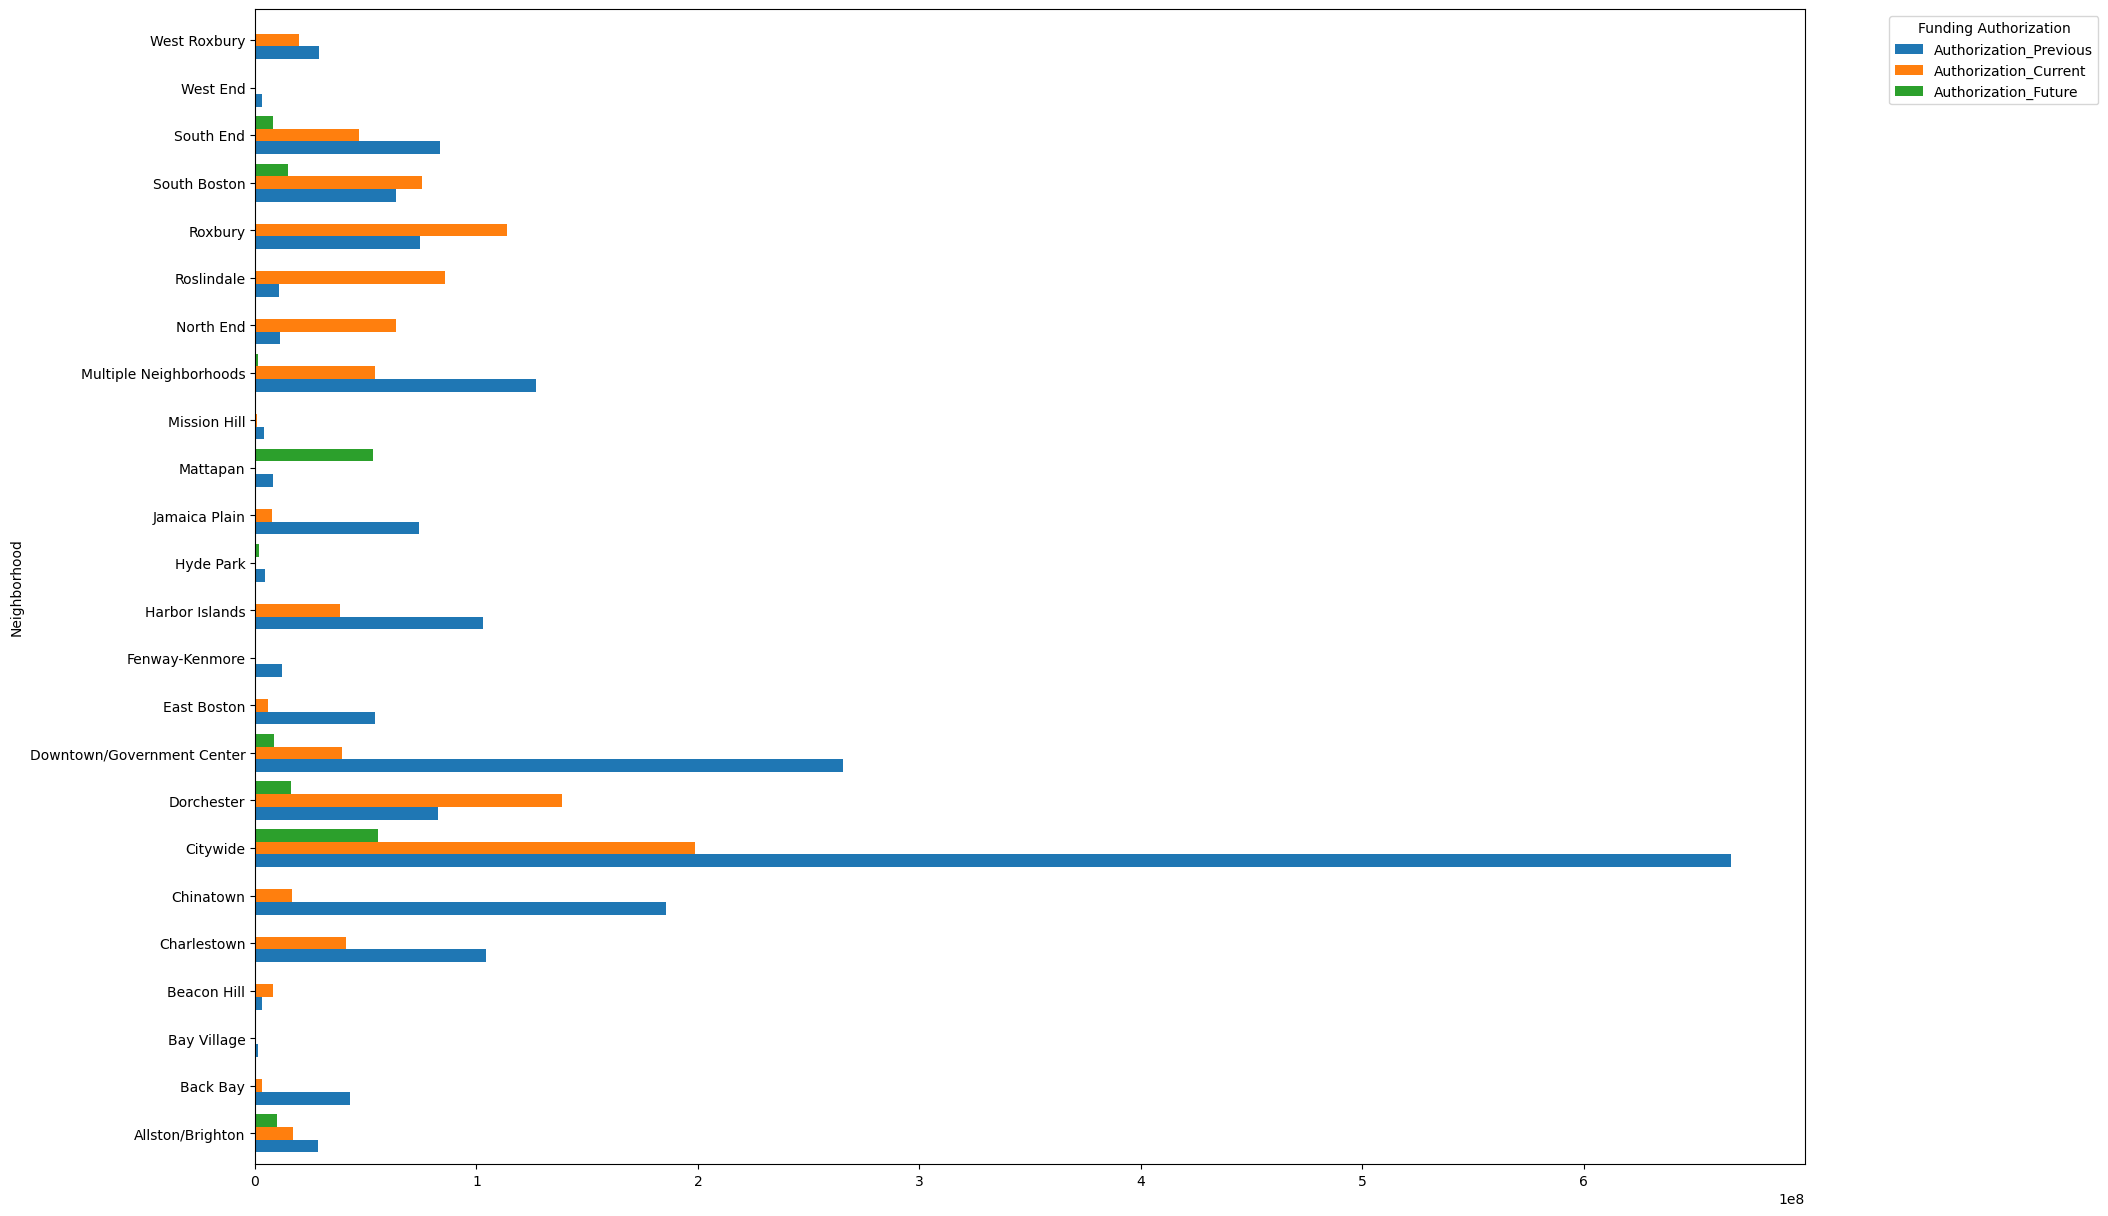

In [34]:
auth_budget_columns = ['Authorization_Previous',
       'Authorization_Current', 'Authorization_Future']
capital_budget_area.plot.barh(x='Neighborhood', y=auth_budget_columns, figsize=(20,15), width=0.8)

plt.legend(title='Funding Authorization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

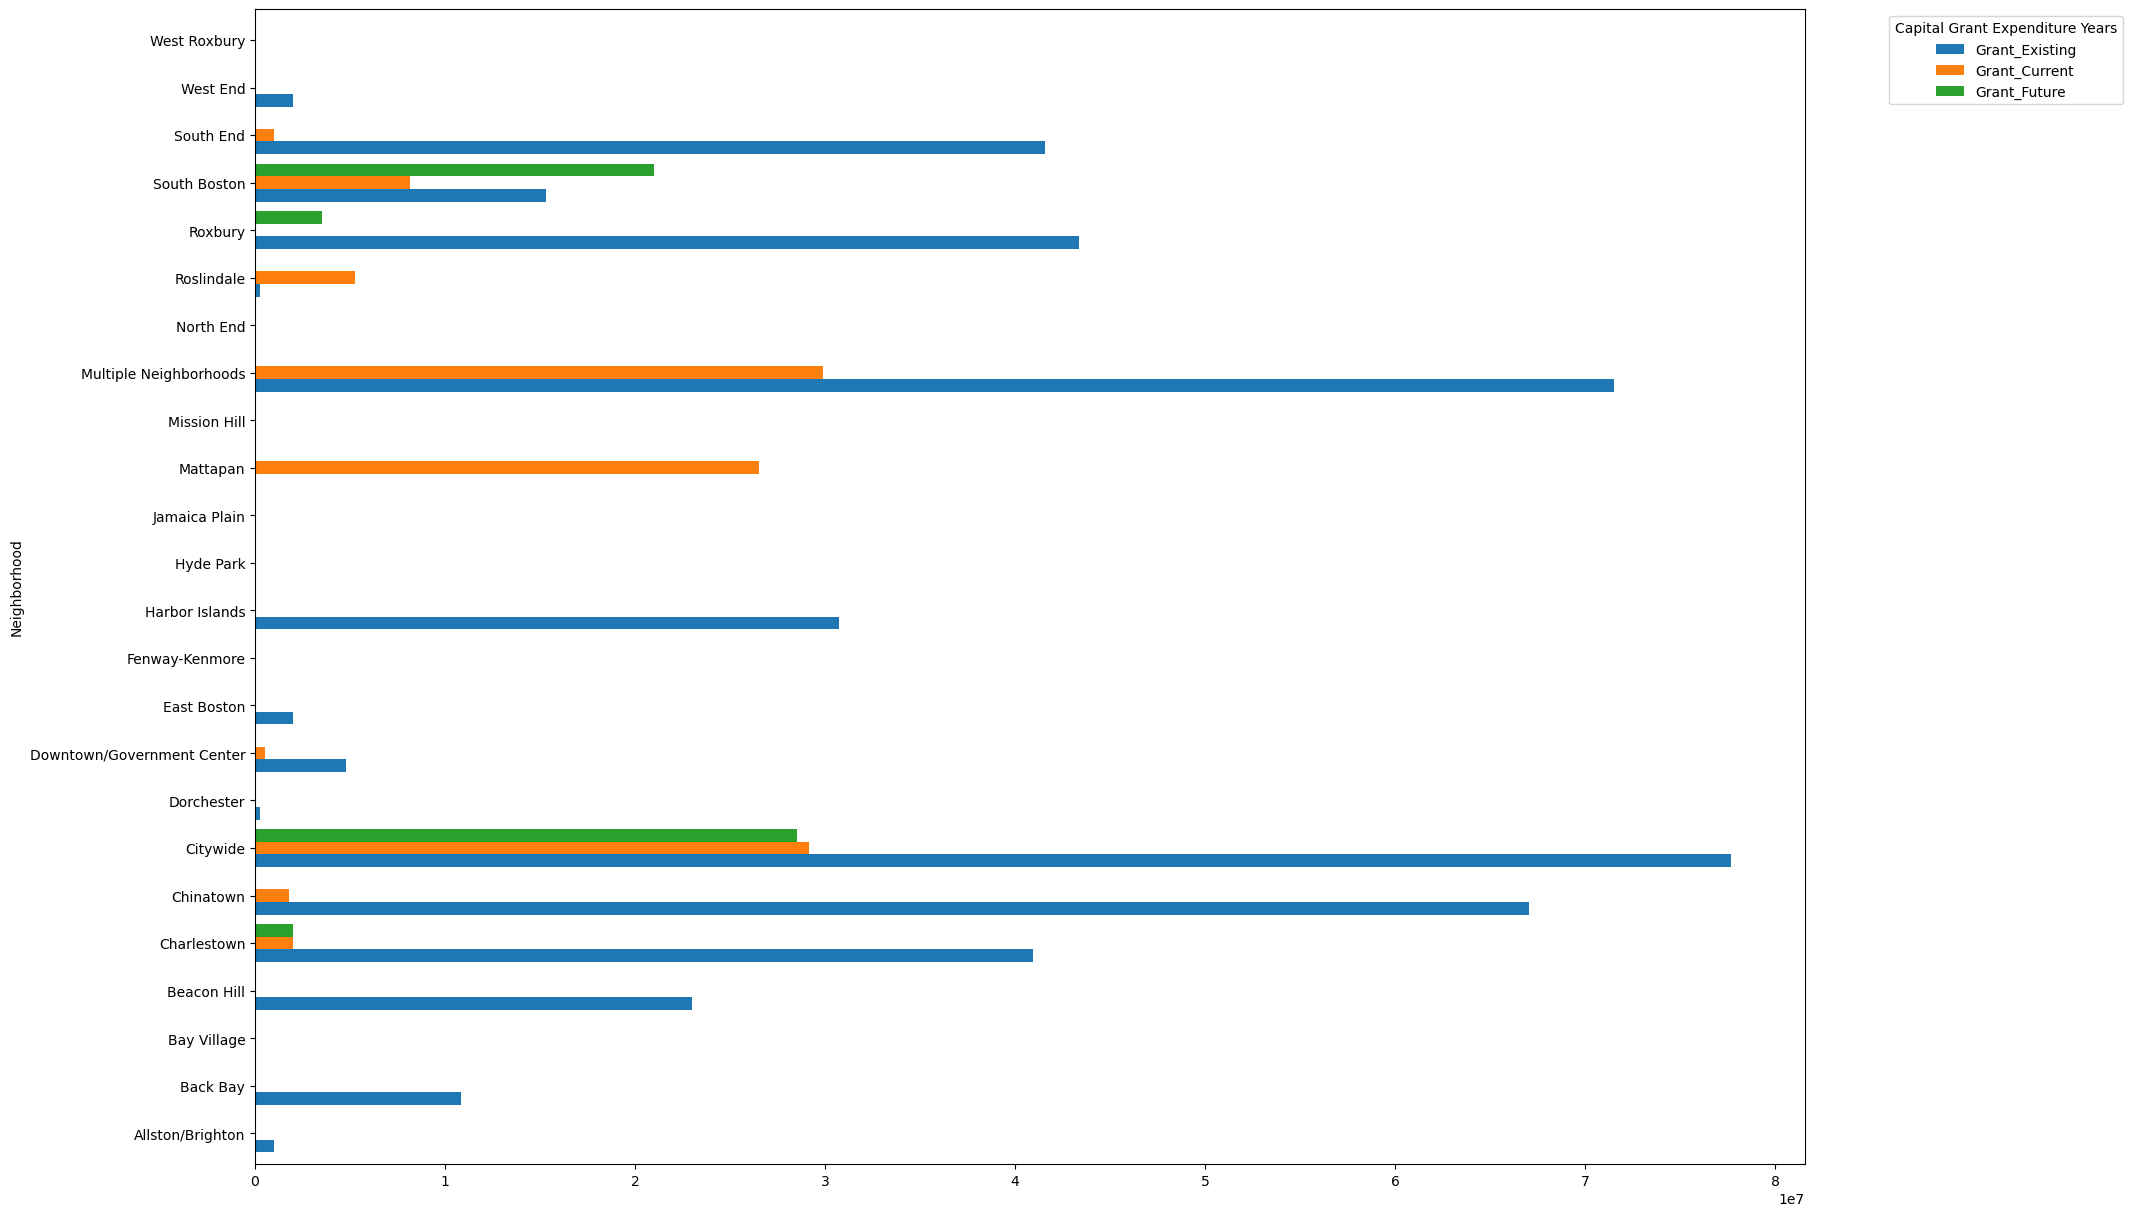

In [36]:
capital_grant_budget_columns = ['Grant_Existing', 'Grant_Current', 'Grant_Future']
capital_budget_area.plot.barh(x='Neighborhood', y=capital_grant_budget_columns , figsize=(20,15), width=0.8)

plt.legend(title='Capital Grant Expenditure Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

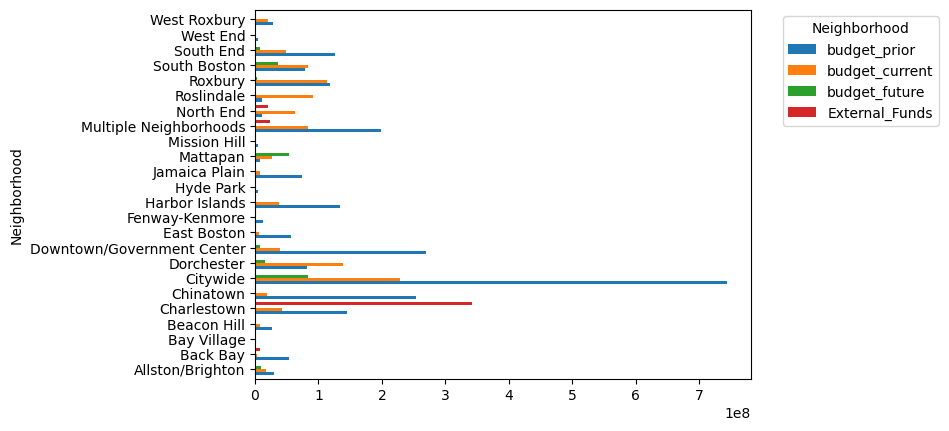

In [47]:
capital_budget_area['budget_prior'] = capital_budget_area[['Grant_Existing', 'Authorization_Previous']].sum(axis=1)
capital_budget_area['budget_current'] = capital_budget_area[['Grant_Current', 'Authorization_Current']].sum(axis=1)
capital_budget_area['budget_future'] = capital_budget_area[['Grant_Future', 'Authorization_Future']].sum(axis=1)

capital_budget_area[['Neighborhood', 'budget_prior', 'budget_current', 'budget_future', 'External_Funds']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

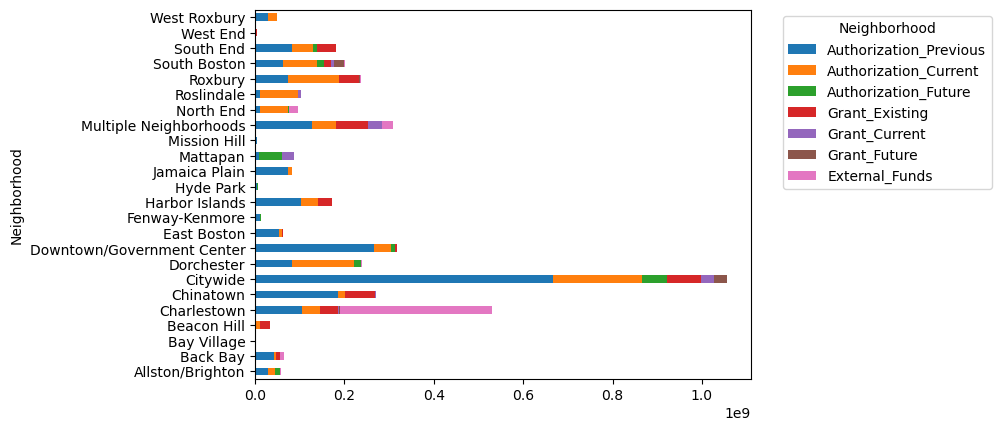

In [40]:
capital_budget_area[budget_columns + ['Neighborhood']].groupby('Neighborhood').sum().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Unlike expenditure, most of the budget for most of the areas are allocated already through prior funding authorizations or grant authorizations. There are a couple of exceptions here, one is Mattapan, which has its most budgets are future funding authorizations, meaning perhaps it is an area that is developing. Another area is Charlestown, which has received most of its budget through external fundings instead of capital budget.

### 3.3 Interesting Areas

Which areas has/will have the most expenditure and budget?

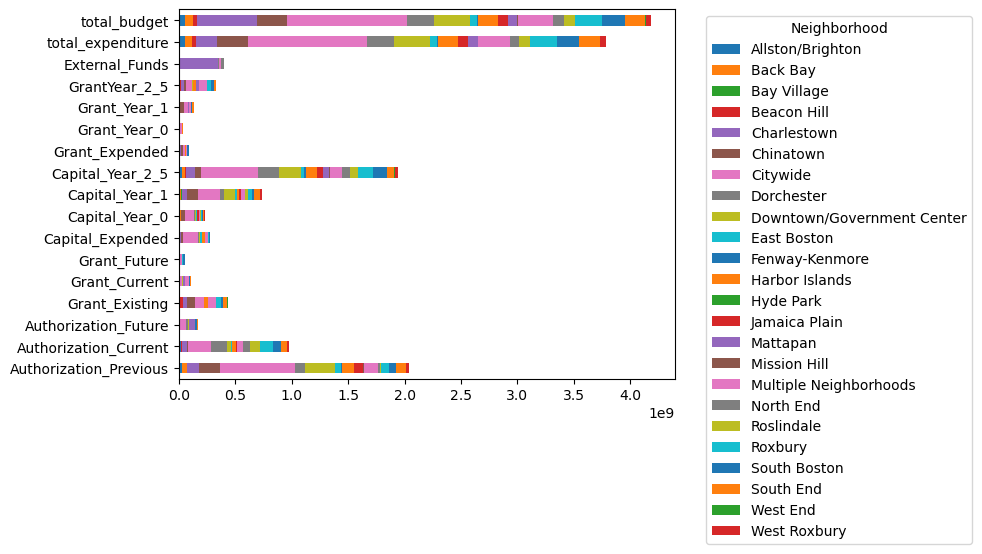

In [42]:
capital_budget_area.drop(columns="Total_Project_Budget").groupby('Neighborhood').sum().transpose().plot(kind='barh',stacked=True)

plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The plot shows that the majority of future fundings would go to Citywide projects; Dorchester and Roslindale are the single areas that would have the most expenditures. Charlestown is the single area that received the mojority of the externel funds, which would be interesting to find the reason.

## 4. Compare budget and expenditure

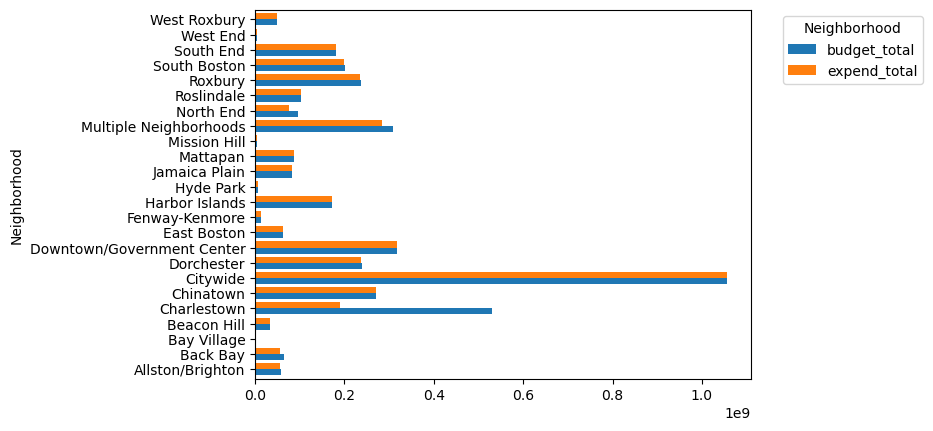

In [48]:
capital_budget_area['budget_total'] = capital_budget_area[['budget_prior', 'budget_current', 'budget_future', 'External_Funds']].sum(axis=1)
capital_budget_area['expend_total'] = capital_budget_area[['expend_year_prior', 'expend_year_current', 'expend_year_future']].sum(axis=1)

capital_budget_area[['Neighborhood', 'budget_total', 'expend_total']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

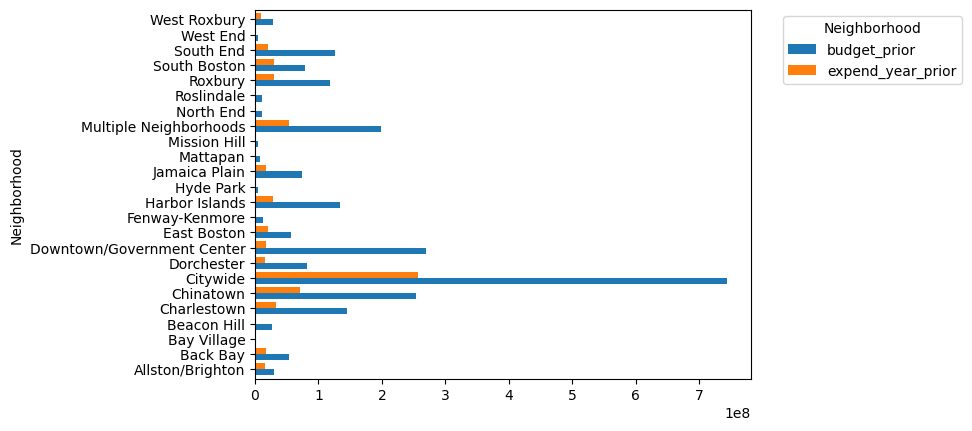

In [49]:
capital_budget_area[['Neighborhood', 'budget_prior', 'expend_year_prior']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

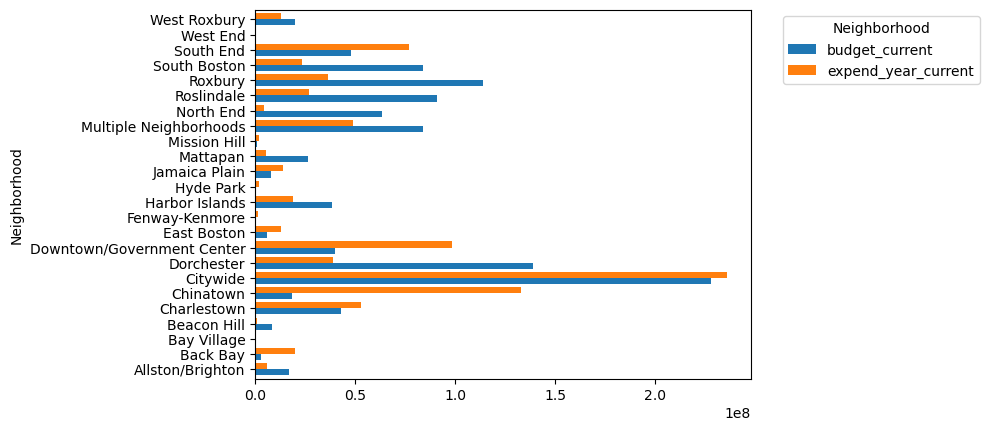

In [50]:
capital_budget_area[['Neighborhood', 'budget_current', 'expend_year_current']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

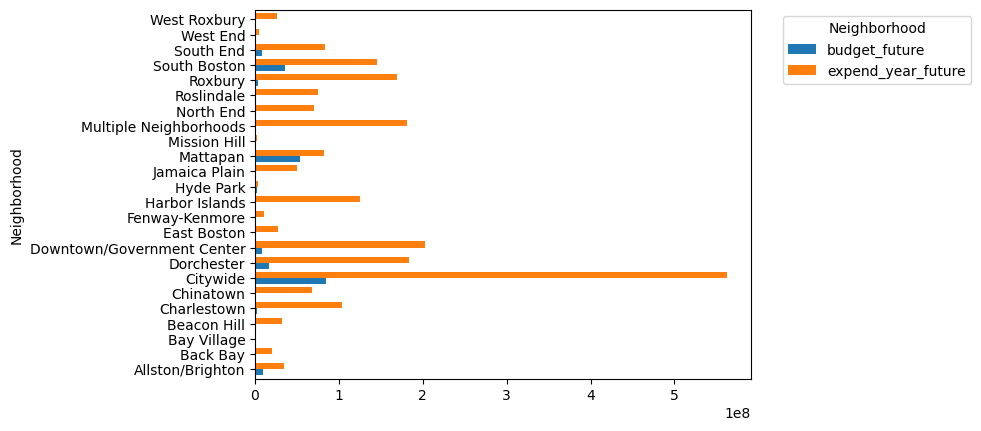

In [51]:
capital_budget_area[['Neighborhood', 'budget_future', 'expend_year_future']].plot.barh(x='Neighborhood',  width=0.8)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The results show that the total amount of projected spending (budget) is at least the total amount of the expenditure. However, they are distributed differently. The budget are mostly set in the prior years for all areas, while the spending would occur in the future years instead. This means that the budgeting projects are long term projects, and possibly many of them are going longer than they were initially planned.